In [10]:
%matplotlib inline

# feature engineering

**寻找描述数据最恰当的feature**

![train](images/train_1.jpg)

## 1. 数据的标准化（连续型参数）

**最基本的一种预处理手段。各特征若scale差异很大，可能在训练的数值运算过程中产生显著bias，stardardization的目的是去除这种由于scale显著差异而导致的bias**

通过线性变换（平移和rescale），使各维度的参数中心为0，标准差为1。可视为一种 trivial unsupervised learning， 在 sklearn 中用 transformer表示。

> tip：当feature各维度是连续的，含义差别大，尺度差别大，且没有更多思路时，总可以先进行standardization，standardization 确保各feature的scale大体一致。如同，我们对事件发生的概率没有更多信息时，总可以先假定事件发生概率是均匀分布的。

In [15]:
from sklearn.preprocessing import scale
import numpy as np

data = np.array([
[0.06, 1.0,  52, 1050],
[0.14, 1.4, 214, 3481],
[0.02, 2.6,  78, 4229]
])

x = scale(data) # mu = 0, var = 1

# print("x=%s" % x)

# print("data mean=%s" % np.mean(data, axis=0))
# print("data var=%s" % np.var(data, axis=0))

# print("x mean=%s" % np.mean(x, axis=0))
# print("x var=%s" % np.var(x, axis=0))


In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, stratify=y)


mean_X = train_X.mean(axis=0)
std_X = train_X.std(axis=0)

# 手动standardization
train_X_standardized = (train_X - mean_X )/std_X
train_X_standardized.mean(axis=0)
train_X_standardized.std(axis=0)

#自动scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_X)
train_X_standardized = scaler.transform(train_X)
test_X_standardized = scaler.transform(test_X)

> 注意：有的时候同类型 feature“自然的”variance差异，应当保留

## 2.  dimensionality reduction (数据降维)

- [PCA （Principal Component Analysis）](PCA.ipynb)

- 其他降维手段：feature selection（寻找和目标）

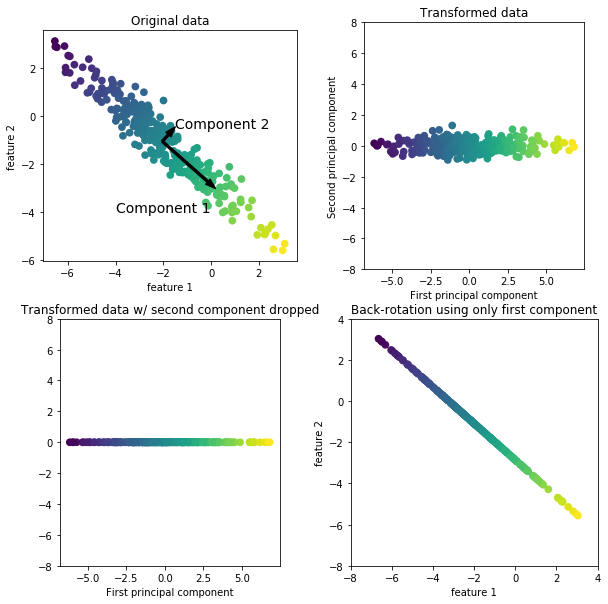

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


def plot_pca_illustration():
    rnd = np.random.RandomState(5)
    X_ = rnd.normal(size=(300, 2))
    X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)

    pca = PCA()
    pca.fit(X_blob)
    X_pca = pca.transform(X_blob)

    S = X_pca.std(axis=0)

    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes = axes.ravel()

    axes[0].set_title("Original data")
    axes[0].scatter(X_blob[:, 0], X_blob[:, 1], c=X_pca[:, 0], linewidths=0,
                    s=60, cmap='viridis')
    axes[0].set_xlabel("feature 1")
    axes[0].set_ylabel("feature 2")
    axes[0].arrow(pca.mean_[0], pca.mean_[1], S[0] * pca.components_[0, 0],
                  S[0] * pca.components_[0, 1], width=.1, head_width=.3,
                  color='k')
    axes[0].arrow(pca.mean_[0], pca.mean_[1], S[1] * pca.components_[1, 0],
                  S[1] * pca.components_[1, 1], width=.1, head_width=.3,
                  color='k')
    axes[0].text(-1.5, -.5, "Component 2", size=14)
    axes[0].text(-4, -4, "Component 1", size=14)
    axes[0].set_aspect('equal')

    axes[1].set_title("Transformed data")
    axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=X_pca[:, 0], linewidths=0,
                    s=60, cmap='viridis')
    axes[1].set_xlabel("First principal component")
    axes[1].set_ylabel("Second principal component")
    axes[1].set_aspect('equal')
    axes[1].set_ylim(-8, 8)

    pca = PCA(n_components=1)
    pca.fit(X_blob)
    X_inverse = pca.inverse_transform(pca.transform(X_blob))

    axes[2].set_title("Transformed data w/ second component dropped")
    axes[2].scatter(X_pca[:, 0], np.zeros(X_pca.shape[0]), c=X_pca[:, 0],
                    linewidths=0, s=60, cmap='viridis')
    axes[2].set_xlabel("First principal component")
    axes[2].set_aspect('equal')
    axes[2].set_ylim(-8, 8)

    axes[3].set_title("Back-rotation using only first component")
    axes[3].scatter(X_inverse[:, 0], X_inverse[:, 1], c=X_pca[:, 0],
                    linewidths=0, s=60, cmap='viridis')
    axes[3].set_xlabel("feature 1")
    axes[3].set_ylabel("feature 2")
    axes[3].set_aspect('equal')
    axes[3].set_xlim(-8, 4)
    axes[3].set_ylim(-8, 4)

plot_pca_illustration()

## 2. feature representation

对于简单的numerical参数，representation是其自身

### 2.1 categorical feature：one-hot 编码

- <span style="text-decoration:line-through">ordinal: 如尺码、评分等级</span> (discreted numerical, 假冒的类别型特征)
- nominal: 如名称、性别 

> why not 0 , 1, 2? 
>
> 携带了不必要的大小排序信息，彼此关系不等价



In [1]:
measurements = [
    {'drink': 'water'},
    {'drink': 'milk'},
    {'drink': 'juice'},
]

# measurements = [
#     {'drink': 'water', 'food': 'beef'},
#     {'drink': 'milk', 'food': 'cake'},
#     {'drink': 'juice', 'food': 'pizza'},
# ]


from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer()

vec.fit_transform(measurements).toarray() # 稀疏矩阵转常规矩阵

array([[ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.]])

In [19]:
 vec.get_feature_names()

可能遇到的问题：

- 维度空间太高，数据太稀疏，对策：稀疏矩阵
- 不能反映样本点之间的潜在亲疏关系，对策：embeding


> 问题：既有数值型参量，又有类别性参量怎么办

### 2.2 文本：bag-of-words encoding （词袋模型）

** 一些基本概念 **

corpus（语料）：document（文案，如一段话或一篇文章）的集合 $D$, 文案数记为 $N$
vocabulary (词库):number of unique words, 词库条目数记为 $K$

词袋模型：每个document用 $K$ 维向量描述

denote the "bare-frequency" vector of document $d$ as $x$ (the value for term $t$ is denoted by $f(t,d)$)

term frequency vector of $x^\prime$ of document $d$ for word $t$ is given by, $tf(t, d)\equiv {f(t,d) + 1\over |x|}$,
$1$ is for smoothing, denominator for normalizing long document.   

some variant, such as, "logarithmically scaled term frequencies" $tf(t, d)\equiv\log(f(t,d) + 1)$, to mitigate long document

inverse document frequency $idf(t,D)\equiv \log{N\over 1+ n}$, $N$ is the size of the corpus $D$, $n$ is the number documents which contain term $t$.


表征一句话或一个document的步骤：

1. 预处理：（中文需要先分词）生僻词用UNK代替，stop words过滤 （英语the a and，中文 了，的，着等），同义词合并（text to lowercase，同根词合并，如running run）
（起到 dimensionality reduction 效果）

2. 通过计算某个document中所有词汇的tf-idf 值，给出表征该document的向量

hashing tricks，节省下词汇dict的存储空间，同时不比提前preview所有document，因而使用于“在线”学习问题 （cons：可能存在hashing 碰撞）


In [3]:
X = ["Some say the world will end in fire,",
     "Some say in ice."]

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

vectorizer.fit(X)
print(vectorizer.vocabulary_)
print(vectorizer.get_feature_names())


{u'end': 0, u'fire': 1, u'some': 5, u'ice': 2, u'will': 7, u'say': 4, u'in': 3, u'world': 8, u'the': 6}
[u'end', u'fire', u'ice', u'in', u'say', u'some', u'the', u'will', u'world']


In [4]:
X_bag_of_words = vectorizer.transform(X) # sparse matrix
print(X_bag_of_words.toarray())
vectorizer.inverse_transform(X_bag_of_words)

[[1 1 0 1 1 1 1 1 1]
 [0 0 1 1 1 1 0 0 0]]


[array([u'end', u'fire', u'in', u'say', u'some', u'the', u'will', u'world'],
       dtype='<U5'), array([u'ice', u'in', u'say', u'some'],
       dtype='<U5')]

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

vectorizer.fit(X)
print(vectorizer.vocabulary_)
print(vectorizer.get_feature_names())
X_bag_of_words = vectorizer.transform(X) # sparse matrix
print(X_bag_of_words.toarray())
vectorizer.inverse_transform(X_bag_of_words)

# 注意到词语排序信息丢失的问题

{u'end': 0, u'fire': 1, u'some': 5, u'ice': 2, u'will': 7, u'say': 4, u'in': 3, u'world': 8, u'the': 6}
[u'end', u'fire', u'ice', u'in', u'say', u'some', u'the', u'will', u'world']
[[ 0.39166832  0.39166832  0.          0.27867523  0.27867523  0.27867523
   0.39166832  0.39166832  0.39166832]
 [ 0.          0.          0.63009934  0.44832087  0.44832087  0.44832087
   0.          0.          0.        ]]


[array([u'world', u'will', u'the', u'some', u'say', u'in', u'fire', u'end'],
       dtype='<U5'), array([u'some', u'say', u'in', u'ice'],
       dtype='<U5')]

可能遇到的问题：

- 中文有分词问题 （编码问题，对策  #encoding=utf-8）

- 忽略了次序信息，对策：采用sequence描述一句话，序列中的每个词用one-hot编码或者用embedding 编码


In [16]:
#encoding=utf-8

import jieba
import jieba.posseg as pseg
import numpy as np
import pandas as pd

df = pd.read_csv('../data/spams.csv', delimiter='\t+',header=None)

corpus_raw = df[1]
y = df[0]


def preprocess_doc(doc):
	words=list(pseg.cut(doc))	
	words_filtered = filter(lambda w: w.flag!= u"x" and w.flag!=u"m" and (w.word not in [u"请", u"的", u"了", u"你", u"我"]), words)
	return " ".join(map(lambda w: w.word, words_filtered))

corpus = map(preprocess_doc, corpus_raw)

for d in corpus:
	print(d)

C:\Users\Lenovo\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
Building prefix dict from the default dictionary ...
Dumping model to file cache c:\users\lenovo\appdata\local\temp\jieba.cache
Loading model cost 2.721 seconds.
Prefix dict has been built succesfully.


您好 代办 各类 证件 文凭 信用卡 咨询
无需 担保 就 可 申请 高额 透支 信用卡 联系 王先生
代办 各类 证件 催账 联系 周先生
尊敬 用户 您 流量 包已 到期 详情 咨询
老板 说 要 今天 要 赶 下工 不 回去 吃饭 哈
今天 去 哪 吃饭 庆祝
代办 信用卡 高利贷 无需 担保 联系 李小姐
话费 快用 完 帮 交


### 2.3 图片：

- 纯像素grascale/rgb 值向量
- sift提供矢量（Scale-Invariant Feature Transform ）或 Speeded-Up Robust Features (SURF) descriptor
- CNN 自动提取特征

In [12]:
from skimage.io import imread, imshow, show

data = imread("images/neo.png")

print(data)

imshow(data)
show()